In [ ]:

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
pip install ultralytics


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 780.6/780.6 kB 17.4 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-

In [ ]:
import time
import psutil
import torch
import matplotlib.pyplot as plt
from ultralytics import YOLO
from sklearn.metrics import precision_score, recall_score, f1_score
from torch.utils.data import DataLoader
from torchvision import transforms, datasets
import os
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


# yolov8 batch=2,lr=0.01

In [ ]:
import time
import torch
from ultralytics import YOLO
import matplotlib.pyplot as plt

data_path = '/content/drive/MyDrive/Colab Notebooks/archive (39)/data.yaml'

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = YOLO('yolov8n.pt').to(device)

start_time = time.time()

train_metrics_list = []
val_metrics_list = []

num_epochs = 5

for epoch in range(1, num_epochs + 1):
    results = model.train(data=data_path, epochs=1, batch=2,lr0=0.01,device=device)
    train_metrics_list.append(results.results_dict)
    print('number of epoch:',epoch)

    val_results = model.val()
    val_metrics_list.append(val_results.results_dict)

end_time = time.time()

training_time = end_time - start_time

print(f"Training Time: {training_time} seconds")

print(f"Memory Allocated: {torch.cuda.memory_allocated(device) / 1024 ** 3} GB")
print(f"Memory Reserved: {torch.cuda.memory_reserved(device) / 1024 ** 3} GB")




100%|██████████| 6.23M/6.23M [00:00<00:00, 210MB/s]


engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/Colab Notebooks/archive (39)/data.yaml, epochs=1, time=None, patience=100, batch=2, imgsz=640, save=True, save_period=-1, cache=False, device=cuda, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=None, format=torchscript, keras

100%|██████████| 755k/755k [00:00<00:00, 123MB/s]


Overriding model.yaml nc=80 with nc=5

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,


AMP: checks passed ✅


train: Scanning /content/drive/MyDrive/Colab Notebooks/archive (39)/train/labels.cache... 5805 images, 93 backgrounds, 0 corrupt: 100%|██████████| 5805/5805 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/drive/MyDrive/Colab Notebooks/archive (39)/valid/labels.cache... 549 images, 8 backgrounds, 0 corrupt: 100%|██████████| 549/549 [00:00<?, ?it/s]


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001111, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train
Starting training for 1 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/2903 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,
        1/1      0.64G      1.437      1.669      1.156         43        640: 100%|██████████| 2903/2903 [10:11<00:00,  4.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 138/138 [00:12<00:00, 10.86it/s]


                   all        549       6270      0.668      0.609       0.64      0.405

1 epochs completed in 0.175 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.2.31 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
Model summary (fused): 168 layers, 3006623 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 138/138 [00:07<00:00, 18.49it/s]


                   all        549       6270      0.667      0.609      0.639      0.404
               bicycle        189        250       0.75      0.536      0.608      0.414
                   bus         81        108      0.448       0.63      0.548      0.411
                   car        520       3842      0.845       0.83        0.9      0.625
             motorbike        331       1238      0.852      0.507      0.661      0.363
                person        196        832      0.443      0.542      0.478      0.207
Speed: 0.2ms preprocess, 2.4ms inference, 0.0ms loss, 1.5ms postprocess per image
Results saved to runs/detect/train
number of epoch: 1
Ultralytics YOLOv8.2.31 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
Model summary (fused): 168 layers, 3006623 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/drive/MyDrive/Colab Notebooks/archive (39)/valid/labels.cache... 549 images, 8 backgrounds, 0 corrupt: 100%|██████████| 549/549 [00:00<?, ?it/s]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 275/275 [00:12<00:00, 21.69it/s]


                   all        549       6270      0.668      0.609      0.643      0.407
               bicycle        189        250      0.749      0.536      0.608      0.414
                   bus         81        108       0.45       0.63      0.568      0.427
                   car        520       3842      0.844       0.83      0.899      0.624
             motorbike        331       1238      0.854      0.507      0.663      0.364
                person        196        832      0.441       0.54      0.475      0.208
Speed: 0.3ms preprocess, 5.2ms inference, 0.0ms loss, 1.6ms postprocess per image
Results saved to runs/detect/train2
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/Colab Notebooks/archive (39)/data.yaml, epochs=1, time=None, patience=100, batch=2, imgsz=640, save=True, save_period=-1, cache=False, device=cuda, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, dete

train: Scanning /content/drive/MyDrive/Colab Notebooks/archive (39)/train/labels.cache... 5805 images, 93 backgrounds, 0 corrupt: 100%|██████████| 5805/5805 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/drive/MyDrive/Colab Notebooks/archive (39)/valid/labels.cache... 549 images, 8 backgrounds, 0 corrupt: 100%|██████████| 549/549 [00:00<?, ?it/s]


Plotting labels to runs/detect/train3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001111, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train3
Starting training for 1 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/1     0.652G      1.613      1.476       1.29         43        640: 100%|██████████| 2903/2903 [03:23<00:00, 14.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 138/138 [00:08<00:00, 15.77it/s]


                   all        549       6270      0.687      0.586      0.651      0.418

1 epochs completed in 0.072 hours.
Optimizer stripped from runs/detect/train3/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train3/weights/best.pt, 6.2MB

Validating runs/detect/train3/weights/best.pt...
Ultralytics YOLOv8.2.31 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
Model summary (fused): 168 layers, 3006623 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 138/138 [00:06<00:00, 21.61it/s]


                   all        549       6270      0.686      0.586       0.65      0.418
               bicycle        189        250      0.902      0.432      0.612      0.423
                   bus         81        108      0.339      0.787      0.697      0.526
                   car        520       3842      0.828      0.841      0.894      0.618
             motorbike        331       1238      0.749      0.578      0.644      0.345
                person        196        832      0.612      0.291      0.403      0.176
Speed: 0.4ms preprocess, 2.6ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to runs/detect/train3
number of epoch: 2
Ultralytics YOLOv8.2.31 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
Model summary (fused): 168 layers, 3006623 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/drive/MyDrive/Colab Notebooks/archive (39)/valid/labels.cache... 549 images, 8 backgrounds, 0 corrupt: 100%|██████████| 549/549 [00:00<?, ?it/s]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 275/275 [00:11<00:00, 23.90it/s]


                   all        549       6270      0.683      0.588      0.651      0.419
               bicycle        189        250      0.901      0.432      0.612      0.423
                   bus         81        108      0.339      0.787        0.7       0.53
                   car        520       3842      0.823      0.843      0.895      0.619
             motorbike        331       1238      0.739       0.58      0.643      0.345
                person        196        832      0.612      0.298      0.407      0.178
Speed: 0.3ms preprocess, 5.6ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to runs/detect/train32
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/Colab Notebooks/archive (39)/data.yaml, epochs=1, time=None, patience=100, batch=2, imgsz=640, save=True, save_period=-1, cache=False, device=cuda, workers=8, project=None, name=train33, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, de

train: Scanning /content/drive/MyDrive/Colab Notebooks/archive (39)/train/labels.cache... 5805 images, 93 backgrounds, 0 corrupt: 100%|██████████| 5805/5805 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/drive/MyDrive/Colab Notebooks/archive (39)/valid/labels.cache... 549 images, 8 backgrounds, 0 corrupt: 100%|██████████| 549/549 [00:00<?, ?it/s]


Plotting labels to runs/detect/train33/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001111, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train33
Starting training for 1 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/1     0.665G      1.313      1.102      1.105         43        640: 100%|██████████| 2903/2903 [03:26<00:00, 14.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 138/138 [00:09<00:00, 15.15it/s]


                   all        549       6270      0.684      0.631      0.677      0.441

1 epochs completed in 0.101 hours.
Optimizer stripped from runs/detect/train33/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train33/weights/best.pt, 6.2MB

Validating runs/detect/train33/weights/best.pt...
Ultralytics YOLOv8.2.31 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
Model summary (fused): 168 layers, 3006623 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 138/138 [00:06<00:00, 20.19it/s]


                   all        549       6270      0.684      0.631      0.677      0.441
               bicycle        189        250      0.863      0.504      0.654      0.461
                   bus         81        108      0.388      0.824      0.722      0.561
                   car        520       3842      0.822      0.862      0.903      0.629
             motorbike        331       1238      0.783      0.606      0.684      0.366
                person        196        832      0.563      0.359      0.422      0.187
Speed: 0.2ms preprocess, 2.4ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to runs/detect/train33
number of epoch: 3
Ultralytics YOLOv8.2.31 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
Model summary (fused): 168 layers, 3006623 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/drive/MyDrive/Colab Notebooks/archive (39)/valid/labels.cache... 549 images, 8 backgrounds, 0 corrupt: 100%|██████████| 549/549 [00:00<?, ?it/s]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 275/275 [00:12<00:00, 22.29it/s]


                   all        549       6270      0.683      0.632       0.68      0.443
               bicycle        189        250      0.862      0.504      0.655       0.46
                   bus         81        108      0.381      0.824      0.728      0.569
                   car        520       3842      0.821      0.862      0.903       0.63
             motorbike        331       1238      0.786      0.607      0.687      0.366
                person        196        832      0.565      0.363      0.426      0.189
Speed: 0.2ms preprocess, 4.3ms inference, 0.0ms loss, 1.8ms postprocess per image
Results saved to runs/detect/train332
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/Colab Notebooks/archive (39)/data.yaml, epochs=1, time=None, patience=100, batch=2, imgsz=640, save=True, save_period=-1, cache=False, device=cuda, workers=8, project=None, name=train333, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, 

train: Scanning /content/drive/MyDrive/Colab Notebooks/archive (39)/train/labels.cache... 5805 images, 93 backgrounds, 0 corrupt: 100%|██████████| 5805/5805 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/drive/MyDrive/Colab Notebooks/archive (39)/valid/labels.cache... 549 images, 8 backgrounds, 0 corrupt: 100%|██████████| 549/549 [00:00<?, ?it/s]


Plotting labels to runs/detect/train333/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001111, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train333
Starting training for 1 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/1     0.797G      1.229     0.9771      1.063         43        640: 100%|██████████| 2903/2903 [03:27<00:00, 14.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 138/138 [00:08<00:00, 15.40it/s]


                   all        549       6270      0.691      0.659      0.704      0.459

1 epochs completed in 0.101 hours.
Optimizer stripped from runs/detect/train333/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train333/weights/best.pt, 6.2MB

Validating runs/detect/train333/weights/best.pt...
Ultralytics YOLOv8.2.31 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
Model summary (fused): 168 layers, 3006623 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 138/138 [00:06<00:00, 21.43it/s]


                   all        549       6270      0.695      0.656      0.705      0.459
               bicycle        189        250      0.854      0.514      0.677      0.473
                   bus         81        108      0.429      0.852       0.78      0.598
                   car        520       3842      0.829      0.877      0.906      0.635
             motorbike        331       1238      0.787      0.628      0.702      0.382
                person        196        832      0.578      0.409      0.461       0.21
Speed: 0.3ms preprocess, 3.3ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to runs/detect/train333
number of epoch: 4
Ultralytics YOLOv8.2.31 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
Model summary (fused): 168 layers, 3006623 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/drive/MyDrive/Colab Notebooks/archive (39)/valid/labels.cache... 549 images, 8 backgrounds, 0 corrupt: 100%|██████████| 549/549 [00:00<?, ?it/s]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 275/275 [00:12<00:00, 22.69it/s]


                   all        549       6270      0.695      0.658      0.705      0.459
               bicycle        189        250      0.853      0.516      0.674      0.471
                   bus         81        108      0.426      0.852      0.778      0.596
                   car        520       3842      0.826      0.878      0.905      0.635
             motorbike        331       1238      0.792      0.632      0.704      0.383
                person        196        832      0.576      0.412      0.462      0.208
Speed: 0.2ms preprocess, 4.5ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to runs/detect/train3332
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/Colab Notebooks/archive (39)/data.yaml, epochs=1, time=None, patience=100, batch=2, imgsz=640, save=True, save_period=-1, cache=False, device=cuda, workers=8, project=None, name=train3333, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0

train: Scanning /content/drive/MyDrive/Colab Notebooks/archive (39)/train/labels.cache... 5805 images, 93 backgrounds, 0 corrupt: 100%|██████████| 5805/5805 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/drive/MyDrive/Colab Notebooks/archive (39)/valid/labels.cache... 549 images, 8 backgrounds, 0 corrupt: 100%|██████████| 549/549 [00:00<?, ?it/s]


Plotting labels to runs/detect/train3333/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001111, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train3333
Starting training for 1 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/1     0.795G      1.172     0.8922      1.036         43        640: 100%|██████████| 2903/2903 [03:27<00:00, 14.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 138/138 [00:08<00:00, 16.09it/s]


                   all        549       6270      0.725      0.659      0.722      0.471

1 epochs completed in 0.101 hours.
Optimizer stripped from runs/detect/train3333/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train3333/weights/best.pt, 6.2MB

Validating runs/detect/train3333/weights/best.pt...
Ultralytics YOLOv8.2.31 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
Model summary (fused): 168 layers, 3006623 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 138/138 [00:06<00:00, 20.58it/s]


                   all        549       6270      0.724      0.659      0.722       0.47
               bicycle        189        250      0.791      0.548      0.675      0.474
                   bus         81        108      0.552      0.843      0.821      0.629
                   car        520       3842      0.875      0.847      0.908      0.638
             motorbike        331       1238      0.803      0.634      0.717      0.388
                person        196        832      0.599      0.425      0.491      0.224
Speed: 0.3ms preprocess, 3.8ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to runs/detect/train3333
number of epoch: 5
Ultralytics YOLOv8.2.31 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
Model summary (fused): 168 layers, 3006623 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/drive/MyDrive/Colab Notebooks/archive (39)/valid/labels.cache... 549 images, 8 backgrounds, 0 corrupt: 100%|██████████| 549/549 [00:00<?, ?it/s]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 275/275 [00:11<00:00, 23.80it/s]


                   all        549       6270      0.727      0.659      0.723      0.472
               bicycle        189        250      0.791      0.548      0.675      0.475
                   bus         81        108      0.559      0.843      0.822      0.633
                   car        520       3842      0.875      0.847      0.907      0.638
             motorbike        331       1238      0.806      0.635       0.72      0.388
                person        196        832      0.605      0.425      0.492      0.225
Speed: 0.2ms preprocess, 4.4ms inference, 0.0ms loss, 1.7ms postprocess per image
Results saved to runs/detect/train33332
Training Time: 2306.1390006542206 seconds
Memory Allocated: 0.1300797462463379 GB
Memory Reserved: 0.447265625 GB


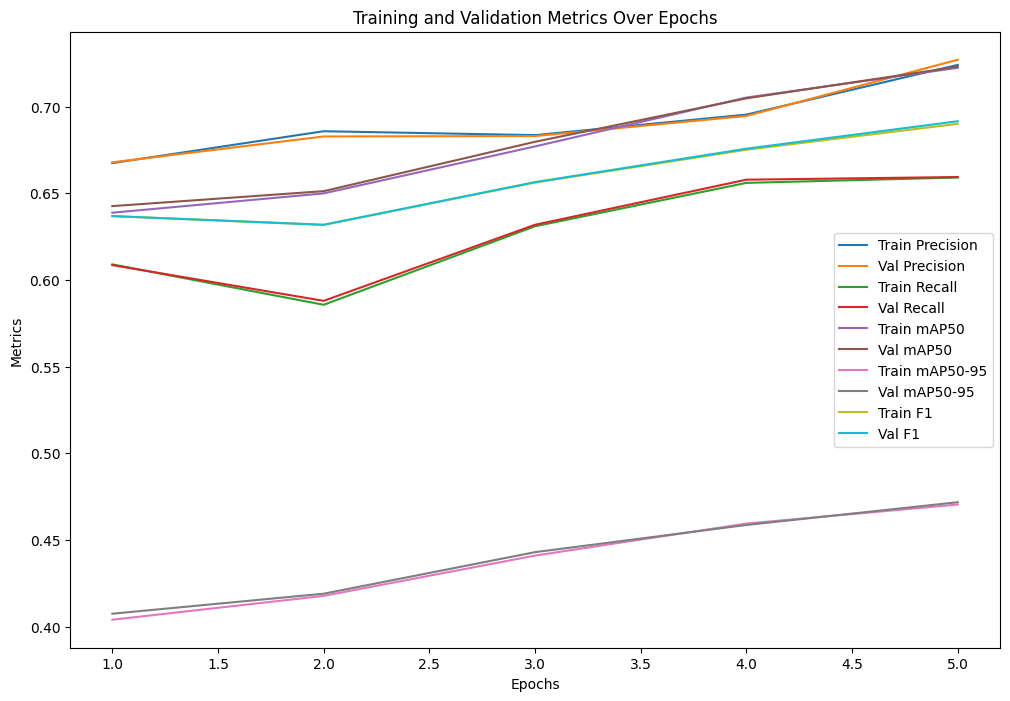

In [ ]:

epochs = list(range(1, num_epochs + 1))

train_precision = []
train_recall = []
train_map50 = []
train_map50_95 = []
train_f1 = []

val_precision = []
val_recall = []
val_map50 = []
val_map50_95 = []
val_f1 = []

for train_metrics, val_metrics in zip(train_metrics_list, val_metrics_list):
    train_precision.append(train_metrics['metrics/precision(B)'])
    train_recall.append(train_metrics['metrics/recall(B)'])
    train_map50.append(train_metrics['metrics/mAP50(B)'])
    train_map50_95.append(train_metrics['metrics/mAP50-95(B)'])
    train_f1.append(2 * (train_precision[-1] * train_recall[-1]) / (train_precision[-1] + train_recall[-1]))

    val_precision.append(val_metrics['metrics/precision(B)'])
    val_recall.append(val_metrics['metrics/recall(B)'])
    val_map50.append(val_metrics['metrics/mAP50(B)'])
    val_map50_95.append(val_metrics['metrics/mAP50-95(B)'])
    val_f1.append(2 * (val_precision[-1] * val_recall[-1]) / (val_precision[-1] + val_recall[-1]))

plt.figure(figsize=(12, 8))
plt.plot(epochs, train_precision, label='Train Precision')
plt.plot(epochs, val_precision, label='Val Precision')
plt.plot(epochs, train_recall, label='Train Recall')
plt.plot(epochs, val_recall, label='Val Recall')
plt.plot(epochs, train_map50, label='Train mAP50')
plt.plot(epochs, val_map50, label='Val mAP50')
plt.plot(epochs, train_map50_95, label='Train mAP50-95')
plt.plot(epochs, val_map50_95, label='Val mAP50-95')
plt.plot(epochs, train_f1, label='Train F1')
plt.plot(epochs, val_f1, label='Val F1')
plt.xlabel('Epochs')
plt.ylabel('Metrics')
plt.title('Training and Validation Metrics Over Epochs')
plt.legend()
plt.show()


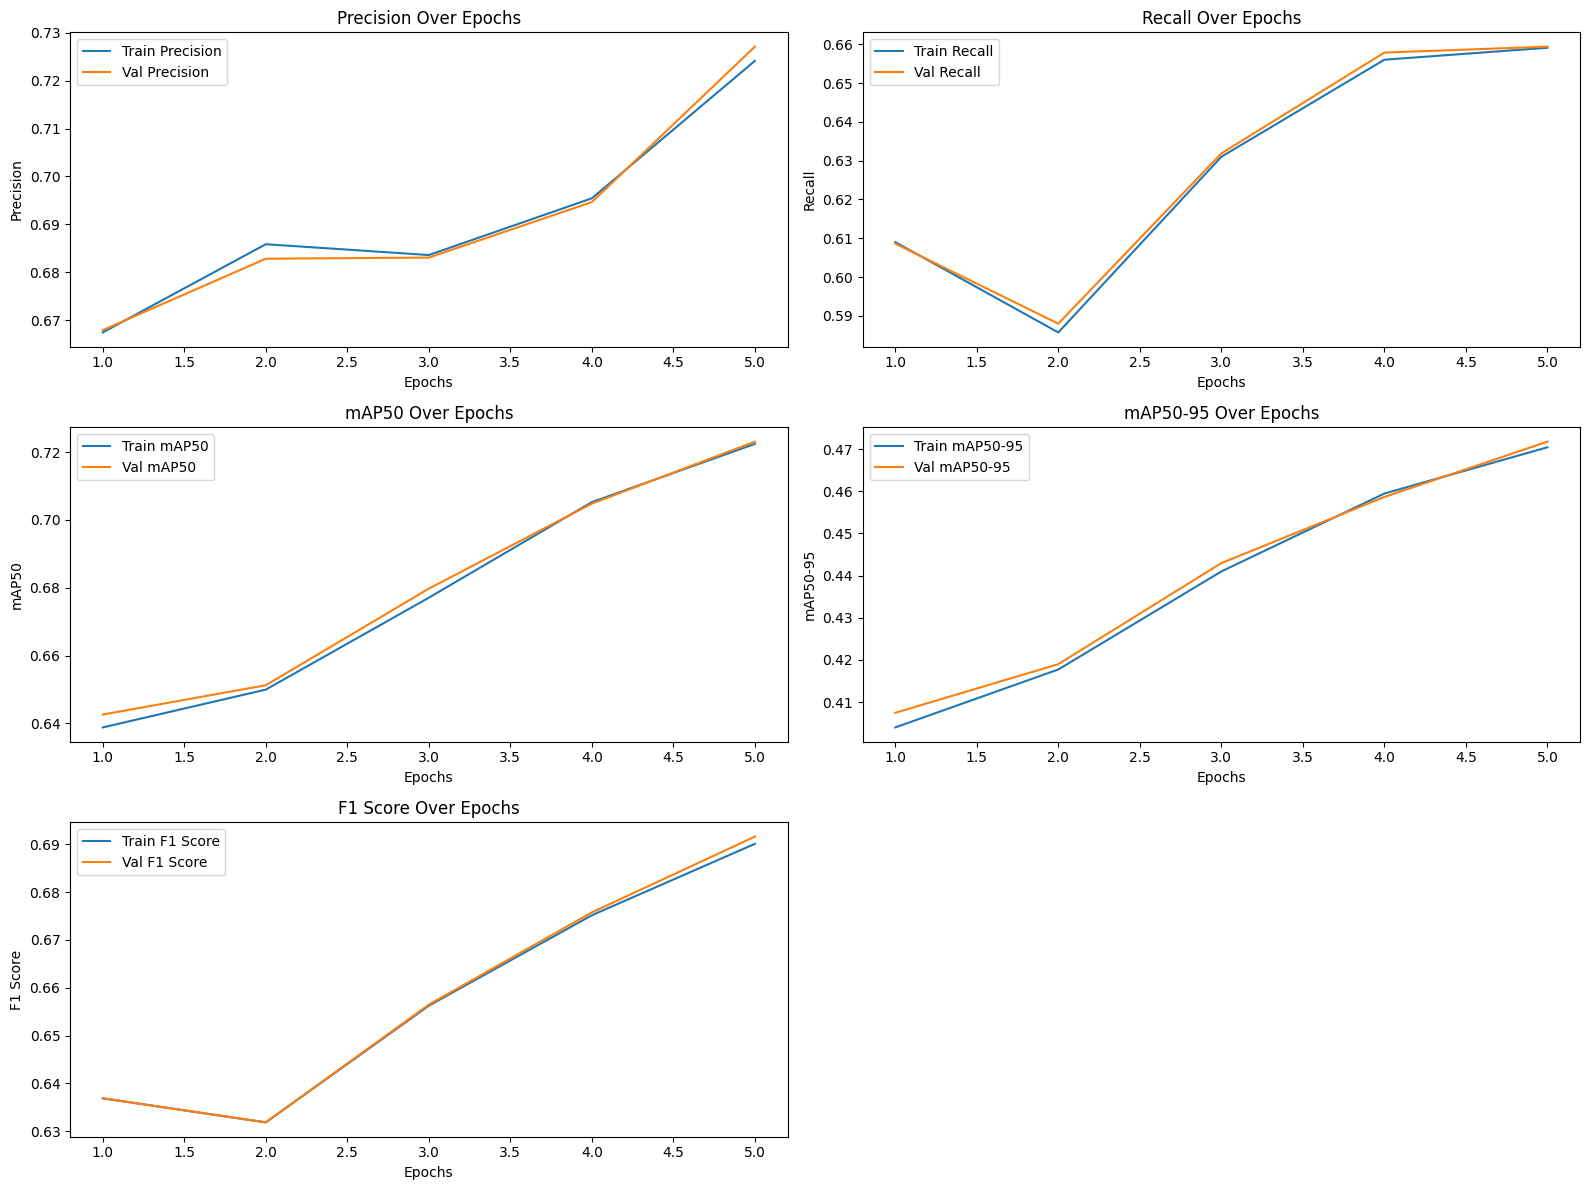

In [ ]:


plt.figure(figsize=(16, 12))

plt.subplot(3, 2, 1)
plt.plot(epochs, train_precision, label='Train Precision')
plt.plot(epochs, val_precision, label='Val Precision')
plt.xlabel('Epochs')
plt.ylabel('Precision')
plt.title('Precision Over Epochs')
plt.legend()

plt.subplot(3, 2, 2)
plt.plot(epochs, train_recall, label='Train Recall')
plt.plot(epochs, val_recall, label='Val Recall')
plt.xlabel('Epochs')
plt.ylabel('Recall')
plt.title('Recall Over Epochs')
plt.legend()

plt.subplot(3, 2, 3)
plt.plot(epochs, train_map50, label='Train mAP50')
plt.plot(epochs, val_map50, label='Val mAP50')
plt.xlabel('Epochs')
plt.ylabel('mAP50')
plt.title('mAP50 Over Epochs')
plt.legend()

plt.subplot(3, 2, 4)
plt.plot(epochs, train_map50_95, label='Train mAP50-95')
plt.plot(epochs, val_map50_95, label='Val mAP50-95')
plt.xlabel('Epochs')
plt.ylabel('mAP50-95')
plt.title('mAP50-95 Over Epochs')
plt.legend()

plt.subplot(3, 2, 5)
plt.plot(epochs, train_f1, label='Train F1 Score')
plt.plot(epochs, val_f1, label='Val F1 Score')
plt.xlabel('Epochs')
plt.ylabel('F1 Score')
plt.title('F1 Score Over Epochs')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
test_results = model.val(data=data_path,split='test')


Ultralytics YOLOv8.2.31 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (NVIDIA L4, 22700MiB)


val: Scanning /content/drive/MyDrive/Colab Notebooks/archive (39)/test/labels.cache... 279 images, 9 backgrounds, 0 corrupt: 100%|██████████| 279/279 [00:00<?, ?it/s]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 140/140 [00:20<00:00,  6.93it/s]


                   all        279       3188      0.737      0.672      0.735      0.478
               bicycle         98        134      0.905      0.552      0.718      0.483
                   bus         36         41      0.479      0.829       0.82      0.634
                   car        259       1911      0.866       0.82      0.892      0.619
             motorbike        164        650      0.785      0.669      0.725      0.408
                person         97        452      0.649      0.488       0.52      0.247
Speed: 0.2ms preprocess, 4.4ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to runs/detect/train33333


In [ ]:
test_metrics=test_results.results_dict

In [ ]:
test_metrics

{'metrics/precision(B)': 0.7370143318349325,
 'metrics/recall(B)': 0.6717152622081113,
 'metrics/mAP50(B)': 0.7350731105033329,
 'metrics/mAP50-95(B)': 0.47820325920883144,
 'fitness': 0.5038902443382816}

In [ ]:
test_f1=2 * (test_metrics['metrics/precision(B)'] * test_metrics['metrics/recall(B)']) / (test_metrics['metrics/precision(B)'] + test_metrics['metrics/recall(B)'])

In [ ]:
print(test_f1)

0.7028513878789302


In [ ]:
# Save the model
torch.save(model.state_dict(), 'yolov8_model_2_0.01_state_dict.pt')


# yolov8 batch=4,lr=0.05

In [ ]:
import time
import torch
from ultralytics import YOLO
import matplotlib.pyplot as plt

data_path = '/content/drive/MyDrive/Colab Notebooks/archive (39)/data.yaml'

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model_2 = YOLO('yolov8n.pt').to(device)

start_time = time.time()

train_metrics_list_2 = []
val_metrics_list_2 = []

num_epochs = 5

for epoch in range(1, num_epochs + 1):
    results_2 = model_2.train(data=data_path, epochs=1, batch=4,lr0=0.05, device=device)
    print('number of epoch:',epoch)
    train_metrics_list_2.append(results_2.results_dict)

    val_results_2 = model_2.val()
    val_metrics_list_2.append(val_results_2.results_dict)

end_time = time.time()

training_time = end_time - start_time

print(f"Training Time: {training_time} seconds")

print(f"Memory Allocated: {torch.cuda.memory_allocated(device) / 1024 ** 3} GB")
print(f"Memory Reserved: {torch.cuda.memory_reserved(device) / 1024 ** 3} GB")




engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/Colab Notebooks/archive (39)/data.yaml, epochs=1, time=None, patience=100, batch=4, imgsz=640, save=True, save_period=-1, cache=False, device=cuda, workers=8, project=None, name=train4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=None, format=torchscript, kera

train: Scanning /content/drive/MyDrive/Colab Notebooks/archive (39)/train/labels.cache... 5805 images, 93 backgrounds, 0 corrupt: 100%|██████████| 5805/5805 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/drive/MyDrive/Colab Notebooks/archive (39)/valid/labels.cache... 549 images, 8 backgrounds, 0 corrupt: 100%|██████████| 549/549 [00:00<?, ?it/s]


Plotting labels to runs/detect/train4/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.05' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001111, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train4
Starting training for 1 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/1452 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,
        1/1     0.994G      1.414      1.571      1.118         22        640: 100%|██████████| 1452/1452 [01:56<00:00, 12.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [00:08<00:00,  7.75it/s]


                   all        549       6270       0.69      0.638       0.67      0.433

1 epochs completed in 0.037 hours.
Optimizer stripped from runs/detect/train4/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train4/weights/best.pt, 6.2MB

Validating runs/detect/train4/weights/best.pt...
Ultralytics YOLOv8.2.31 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
Model summary (fused): 168 layers, 3006623 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [00:07<00:00,  9.39it/s]


                   all        549       6270      0.692      0.638       0.67      0.433
               bicycle        189        250      0.824      0.516      0.665      0.474
                   bus         81        108      0.527      0.759      0.677      0.511
                   car        520       3842      0.842      0.838      0.896      0.631
             motorbike        331       1238      0.714      0.616      0.646      0.344
                person        196        832      0.552      0.459      0.467      0.205
Speed: 0.2ms preprocess, 4.8ms inference, 0.0ms loss, 1.6ms postprocess per image
Results saved to runs/detect/train4
number of epoch: 1
Ultralytics YOLOv8.2.31 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
Model summary (fused): 168 layers, 3006623 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/drive/MyDrive/Colab Notebooks/archive (39)/valid/labels.cache... 549 images, 8 backgrounds, 0 corrupt: 100%|██████████| 549/549 [00:00<?, ?it/s]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 138/138 [00:13<00:00, 10.36it/s]


                   all        549       6270       0.69      0.635      0.671      0.435
               bicycle        189        250      0.825      0.508      0.663      0.477
                   bus         81        108      0.522      0.759      0.685      0.518
                   car        520       3842      0.844      0.838      0.896      0.632
             motorbike        331       1238       0.71      0.612      0.642      0.345
                person        196        832      0.549      0.457      0.467      0.205
Speed: 0.2ms preprocess, 2.7ms inference, 0.0ms loss, 1.5ms postprocess per image
Results saved to runs/detect/train42
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/Colab Notebooks/archive (39)/data.yaml, epochs=1, time=None, patience=100, batch=4, imgsz=640, save=True, save_period=-1, cache=False, device=cuda, workers=8, project=None, name=train43, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, de

train: Scanning /content/drive/MyDrive/Colab Notebooks/archive (39)/train/labels.cache... 5805 images, 93 backgrounds, 0 corrupt: 100%|██████████| 5805/5805 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/drive/MyDrive/Colab Notebooks/archive (39)/valid/labels.cache... 549 images, 8 backgrounds, 0 corrupt: 100%|██████████| 549/549 [00:00<?, ?it/s]


Plotting labels to runs/detect/train43/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.05' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001111, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train43
Starting training for 1 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/1      1.06G      1.601      1.395      1.253         22        640: 100%|██████████| 1452/1452 [02:41<00:00,  8.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [00:09<00:00,  7.60it/s]


                   all        549       6270      0.711      0.608      0.673      0.431

1 epochs completed in 0.049 hours.
Optimizer stripped from runs/detect/train43/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train43/weights/best.pt, 6.2MB

Validating runs/detect/train43/weights/best.pt...
Ultralytics YOLOv8.2.31 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
Model summary (fused): 168 layers, 3006623 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [00:07<00:00,  8.76it/s]


                   all        549       6270      0.714      0.608      0.673      0.431
               bicycle        189        250      0.828      0.496      0.651      0.447
                   bus         81        108      0.668      0.653      0.725      0.554
                   car        520       3842      0.741      0.895      0.904      0.622
             motorbike        331       1238      0.745      0.589      0.639      0.339
                person        196        832      0.586      0.409      0.447      0.193
Speed: 0.2ms preprocess, 3.6ms inference, 0.0ms loss, 2.9ms postprocess per image
Results saved to runs/detect/train43
number of epoch: 2
Ultralytics YOLOv8.2.31 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
Model summary (fused): 168 layers, 3006623 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/drive/MyDrive/Colab Notebooks/archive (39)/valid/labels.cache... 549 images, 8 backgrounds, 0 corrupt: 100%|██████████| 549/549 [00:00<?, ?it/s]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 138/138 [00:12<00:00, 10.93it/s]


                   all        549       6270      0.712      0.608      0.673       0.43
               bicycle        189        250      0.827      0.496      0.652      0.446
                   bus         81        108      0.662      0.652      0.724      0.554
                   car        520       3842      0.742      0.895      0.904      0.621
             motorbike        331       1238      0.747      0.588      0.639       0.34
                person        196        832      0.584      0.407      0.445      0.192
Speed: 0.2ms preprocess, 2.5ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to runs/detect/train432
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/Colab Notebooks/archive (39)/data.yaml, epochs=1, time=None, patience=100, batch=4, imgsz=640, save=True, save_period=-1, cache=False, device=cuda, workers=8, project=None, name=train433, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, 

train: Scanning /content/drive/MyDrive/Colab Notebooks/archive (39)/train/labels.cache... 5805 images, 93 backgrounds, 0 corrupt: 100%|██████████| 5805/5805 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/drive/MyDrive/Colab Notebooks/archive (39)/valid/labels.cache... 549 images, 8 backgrounds, 0 corrupt: 100%|██████████| 549/549 [00:00<?, ?it/s]


Plotting labels to runs/detect/train433/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.05' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001111, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train433
Starting training for 1 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/1      1.08G      1.295      1.032      1.073         22        640: 100%|██████████| 1452/1452 [04:20<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [00:09<00:00,  7.56it/s]


                   all        549       6270      0.749      0.641      0.717      0.469

1 epochs completed in 0.077 hours.
Optimizer stripped from runs/detect/train433/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train433/weights/best.pt, 6.2MB

Validating runs/detect/train433/weights/best.pt...
Ultralytics YOLOv8.2.31 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
Model summary (fused): 168 layers, 3006623 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [00:07<00:00,  8.91it/s]


                   all        549       6270       0.75      0.641      0.717      0.469
               bicycle        189        250      0.796       0.54      0.696      0.489
                   bus         81        108      0.739      0.741      0.799       0.64
                   car        520       3842      0.811      0.877      0.912      0.643
             motorbike        331       1238      0.811       0.61      0.695      0.367
                person        196        832      0.595      0.436      0.482      0.207
Speed: 0.2ms preprocess, 3.2ms inference, 0.0ms loss, 3.2ms postprocess per image
Results saved to runs/detect/train433
number of epoch: 3
Ultralytics YOLOv8.2.31 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
Model summary (fused): 168 layers, 3006623 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/drive/MyDrive/Colab Notebooks/archive (39)/valid/labels.cache... 549 images, 8 backgrounds, 0 corrupt: 100%|██████████| 549/549 [00:00<?, ?it/s]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 138/138 [00:13<00:00, 10.52it/s]


                   all        549       6270      0.752      0.641      0.717      0.469
               bicycle        189        250      0.797       0.54      0.695      0.485
                   bus         81        108       0.74      0.741      0.799      0.641
                   car        520       3842      0.812      0.877      0.912      0.643
             motorbike        331       1238      0.811       0.61      0.698      0.368
                person        196        832      0.597      0.435      0.481      0.206
Speed: 0.2ms preprocess, 2.6ms inference, 0.0ms loss, 1.5ms postprocess per image
Results saved to runs/detect/train4332
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/Colab Notebooks/archive (39)/data.yaml, epochs=1, time=None, patience=100, batch=4, imgsz=640, save=True, save_period=-1, cache=False, device=cuda, workers=8, project=None, name=train4333, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0

train: Scanning /content/drive/MyDrive/Colab Notebooks/archive (39)/train/labels.cache... 5805 images, 93 backgrounds, 0 corrupt: 100%|██████████| 5805/5805 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/drive/MyDrive/Colab Notebooks/archive (39)/valid/labels.cache... 549 images, 8 backgrounds, 0 corrupt: 100%|██████████| 549/549 [00:00<?, ?it/s]


Plotting labels to runs/detect/train4333/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.05' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001111, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train4333
Starting training for 1 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/1      1.08G      1.216     0.9249      1.036         22        640: 100%|██████████| 1452/1452 [04:21<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [00:08<00:00,  7.82it/s]


                   all        549       6270      0.759      0.655      0.723      0.472

1 epochs completed in 0.077 hours.
Optimizer stripped from runs/detect/train4333/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train4333/weights/best.pt, 6.2MB

Validating runs/detect/train4333/weights/best.pt...
Ultralytics YOLOv8.2.31 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
Model summary (fused): 168 layers, 3006623 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [00:07<00:00,  8.77it/s]


                   all        549       6270       0.76      0.653      0.722      0.472
               bicycle        189        250      0.843      0.578      0.712      0.492
                   bus         81        108      0.743      0.759      0.808      0.642
                   car        520       3842      0.803      0.889      0.914      0.644
             motorbike        331       1238       0.79       0.62      0.708      0.383
                person        196        832      0.619      0.419       0.47        0.2
Speed: 0.2ms preprocess, 1.4ms inference, 0.0ms loss, 2.6ms postprocess per image
Results saved to runs/detect/train4333
number of epoch: 4
Ultralytics YOLOv8.2.31 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
Model summary (fused): 168 layers, 3006623 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/drive/MyDrive/Colab Notebooks/archive (39)/valid/labels.cache... 549 images, 8 backgrounds, 0 corrupt: 100%|██████████| 549/549 [00:00<?, ?it/s]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 138/138 [00:12<00:00, 11.15it/s]


                   all        549       6270       0.76      0.655      0.723      0.472
               bicycle        189        250      0.842       0.58      0.712       0.49
                   bus         81        108      0.744      0.759      0.808       0.64
                   car        520       3842      0.803      0.889      0.913      0.645
             motorbike        331       1238      0.792      0.623       0.71      0.383
                person        196        832      0.619      0.422      0.472      0.201
Speed: 0.2ms preprocess, 2.5ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to runs/detect/train43332
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/Colab Notebooks/archive (39)/data.yaml, epochs=1, time=None, patience=100, batch=4, imgsz=640, save=True, save_period=-1, cache=False, device=cuda, workers=8, project=None, name=train43333, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed

train: Scanning /content/drive/MyDrive/Colab Notebooks/archive (39)/train/labels.cache... 5805 images, 93 backgrounds, 0 corrupt: 100%|██████████| 5805/5805 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/drive/MyDrive/Colab Notebooks/archive (39)/valid/labels.cache... 549 images, 8 backgrounds, 0 corrupt: 100%|██████████| 549/549 [00:00<?, ?it/s]


Plotting labels to runs/detect/train43333/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.05' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001111, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train43333
Starting training for 1 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/1      1.08G      1.161     0.8552      1.013         22        640: 100%|██████████| 1452/1452 [04:20<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [00:08<00:00,  7.77it/s]


                   all        549       6270       0.77      0.656       0.74      0.481

1 epochs completed in 0.077 hours.
Optimizer stripped from runs/detect/train43333/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train43333/weights/best.pt, 6.2MB

Validating runs/detect/train43333/weights/best.pt...
Ultralytics YOLOv8.2.31 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
Model summary (fused): 168 layers, 3006623 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [00:07<00:00,  8.68it/s]


                   all        549       6270      0.771      0.655       0.74      0.481
               bicycle        189        250      0.874      0.583      0.739      0.503
                   bus         81        108      0.764      0.731      0.817      0.648
                   car        520       3842      0.766      0.902      0.911      0.634
             motorbike        331       1238      0.796      0.621      0.715      0.392
                person        196        832      0.652      0.439       0.52      0.229
Speed: 0.2ms preprocess, 1.3ms inference, 0.0ms loss, 2.9ms postprocess per image
Results saved to runs/detect/train43333
number of epoch: 5
Ultralytics YOLOv8.2.31 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
Model summary (fused): 168 layers, 3006623 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/drive/MyDrive/Colab Notebooks/archive (39)/valid/labels.cache... 549 images, 8 backgrounds, 0 corrupt: 100%|██████████| 549/549 [00:00<?, ?it/s]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 138/138 [00:12<00:00, 10.99it/s]


                   all        549       6270      0.769      0.657      0.741      0.481
               bicycle        189        250      0.874      0.584      0.738      0.503
                   bus         81        108      0.763      0.731      0.817      0.648
                   car        520       3842      0.765      0.904      0.911      0.634
             motorbike        331       1238      0.796      0.624      0.717      0.393
                person        196        832      0.647      0.442      0.521      0.228
Speed: 0.2ms preprocess, 5.9ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to runs/detect/train433332
Training Time: 1448.2216546535492 seconds
Memory Allocated: 0.2221236228942871 GB
Memory Reserved: 0.681640625 GB


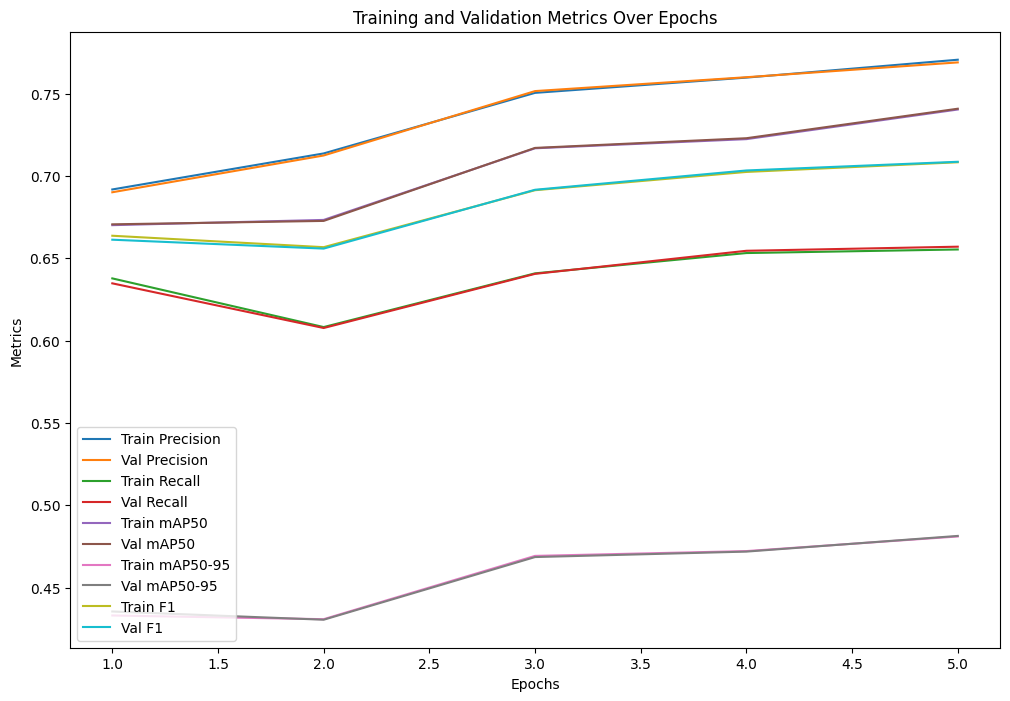

In [ ]:

epochs = list(range(1, num_epochs + 1))

train_precision_2 = []
train_recall_2 = []
train_map50_2 = []
train_map50_95_2 = []
train_f1_2 = []

val_precision_2 = []
val_recall_2 = []
val_map50_2 = []
val_map50_95_2 = []
val_f1_2 = []

for train_metrics, val_metrics in zip(train_metrics_list_2, val_metrics_list_2):
    train_precision_2.append(train_metrics['metrics/precision(B)'])
    train_recall_2.append(train_metrics['metrics/recall(B)'])
    train_map50_2.append(train_metrics['metrics/mAP50(B)'])
    train_map50_95_2.append(train_metrics['metrics/mAP50-95(B)'])
    train_f1_2.append(2 * (train_precision_2[-1] * train_recall_2[-1]) / (train_precision_2[-1] + train_recall_2[-1]))

    val_precision_2.append(val_metrics['metrics/precision(B)'])
    val_recall_2.append(val_metrics['metrics/recall(B)'])
    val_map50_2.append(val_metrics['metrics/mAP50(B)'])
    val_map50_95_2.append(val_metrics['metrics/mAP50-95(B)'])
    val_f1_2.append(2 * (val_precision_2[-1] * val_recall_2[-1]) / (val_precision_2[-1] + val_recall_2[-1]))

plt.figure(figsize=(12, 8))
plt.plot(epochs, train_precision_2, label='Train Precision')
plt.plot(epochs, val_precision_2, label='Val Precision')
plt.plot(epochs, train_recall_2, label='Train Recall')
plt.plot(epochs, val_recall_2, label='Val Recall')
plt.plot(epochs, train_map50_2, label='Train mAP50')
plt.plot(epochs, val_map50_2, label='Val mAP50')
plt.plot(epochs, train_map50_95_2, label='Train mAP50-95')
plt.plot(epochs, val_map50_95_2, label='Val mAP50-95')
plt.plot(epochs, train_f1_2, label='Train F1')
plt.plot(epochs, val_f1_2, label='Val F1')
plt.xlabel('Epochs')
plt.ylabel('Metrics')
plt.title('Training and Validation Metrics Over Epochs')
plt.legend()
plt.show()

plt.show()

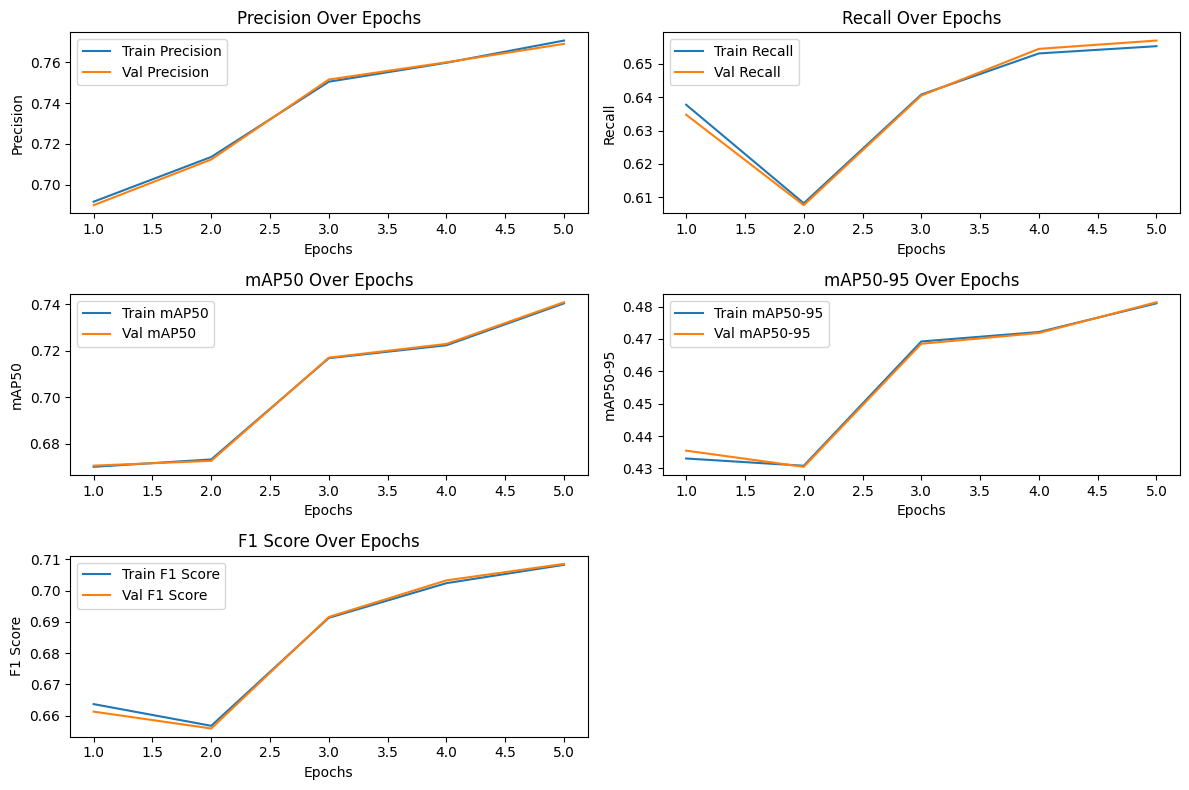

In [ ]:
# Plotting the metrics
plt.figure(figsize=(12, 8))

plt.subplot(3, 2, 1)
plt.plot(epochs, train_precision_2, label='Train Precision')
plt.plot(epochs, val_precision_2, label='Val Precision')
plt.xlabel('Epochs')
plt.ylabel('Precision')
plt.title('Precision Over Epochs')
plt.legend()

plt.subplot(3, 2, 2)
plt.plot(epochs, train_recall_2, label='Train Recall')
plt.plot(epochs, val_recall_2, label='Val Recall')
plt.xlabel('Epochs')
plt.ylabel('Recall')
plt.title('Recall Over Epochs')
plt.legend()

plt.subplot(3, 2, 3)
plt.plot(epochs, train_map50_2, label='Train mAP50')
plt.plot(epochs, val_map50_2, label='Val mAP50')
plt.xlabel('Epochs')
plt.ylabel('mAP50')
plt.title('mAP50 Over Epochs')
plt.legend()

plt.subplot(3, 2, 4)
plt.plot(epochs, train_map50_95_2, label='Train mAP50-95')
plt.plot(epochs, val_map50_95_2, label='Val mAP50-95')
plt.xlabel('Epochs')
plt.ylabel('mAP50-95')
plt.title('mAP50-95 Over Epochs')
plt.legend()

plt.subplot(3, 2, 5)
plt.plot(epochs, train_f1_2, label='Train F1 Score')
plt.plot(epochs, val_f1_2, label='Val F1 Score')
plt.xlabel('Epochs')
plt.ylabel('F1 Score')
plt.title('F1 Score Over Epochs')
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
test_results_2 = model_2.val(data=data_path,split='test')


Ultralytics YOLOv8.2.31 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (NVIDIA L4, 22700MiB)


val: Scanning /content/drive/MyDrive/Colab Notebooks/archive (39)/test/labels.cache... 279 images, 9 backgrounds, 0 corrupt: 100%|██████████| 279/279 [00:00<?, ?it/s]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:06<00:00, 11.29it/s]


                   all        279       3188      0.728      0.701      0.752      0.489
               bicycle         98        134      0.811      0.619      0.759      0.502
                   bus         36         41      0.696       0.84      0.849      0.685
                   car        259       1911       0.74      0.897      0.898       0.62
             motorbike        164        650      0.771      0.664       0.74      0.411
                person         97        452      0.622      0.487      0.516      0.227
Speed: 0.6ms preprocess, 6.8ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to runs/detect/train433333


In [ ]:
test_metrics_2=test_results_2.results_dict
test_metrics_2

{'metrics/precision(B)': 0.728103465232848,
 'metrics/recall(B)': 0.701431385715621,
 'metrics/mAP50(B)': 0.752448856472054,
 'metrics/mAP50-95(B)': 0.48900363467684776,
 'fitness': 0.5153481568563684}

In [ ]:
test_f1_2=2 * (test_metrics_2['metrics/precision(B)'] * test_metrics_2['metrics/recall(B)']) / (test_metrics_2['metrics/precision(B)'] + test_metrics_2['metrics/recall(B)'])

In [ ]:
print(test_f1_2)

0.7145186033397825


In [ ]:
# Save the model
torch.save(model_2.state_dict(), 'yolov8_model_4_0.05_state_dict.pt')
